False
True


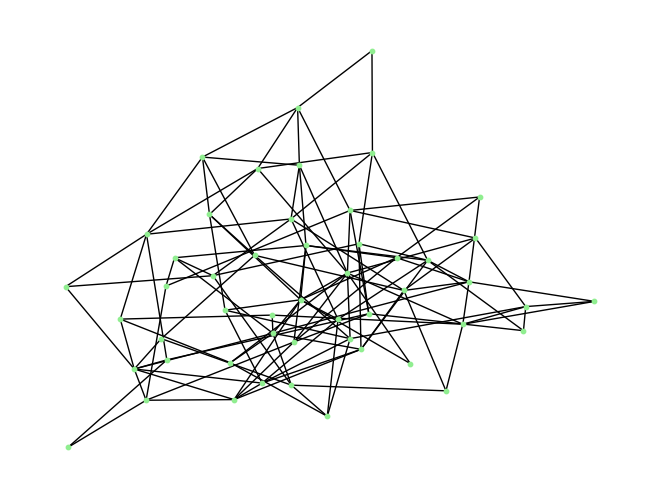

In [52]:
import numpy as np
import networkx as nx
class Graph:
    def __init__(self, n, p):
        self.n = n
        self.p = p
        self.vertices = range(n)
        # self.edges = np.zeros((n, n))
        self.edges = {}
        self.edge_count = 0

        for i in range(n):
            self.edges[i] = []
        self.nx = nx.Graph()
        self.nx.add_nodes_from(self.vertices)

        for i in range(n):
            for j in range(i + 1, n):
                c = np.random.rand()
                if c < p:
                    self.edges[i].append(j)
                    self.edges[j].append(i)

                    self.nx.add_edge(i, j)
                    self.edge_count += 1
    
    def draw(self):
        # draw the graph using nx
        nx.draw(self.nx, node_size = 10, with_labels=False, node_color='lightgreen')
    
    def print_edge_ev(self):
        print(self.n * (self.n - 1) / 2 * self.p)
    

    def is_connected(self, vertices, adj):
        # check if graph is connected
        visited = set()
        def dfs(start):
            visited.add(start)
            for v in adj[start]:
                if not (v in visited):
                    dfs(v)
        dfs(vertices[0])
        return len(visited) == len(vertices)\
    
    def robust_conn(self, deleted):
        visited = set()
        def dfs(start):
            visited.add(start)
            for v in self.edges[start]:
                if v not in deleted:
                    dfs(v)
        return len(visited) == (len(self.vertices) - len(deleted))
    
    
    def g_conn(self):
        return self.is_connected(g.vertices, g.edges)
    
    def g_k_conn(self, k=2):
        for i in range(self.n):
            deleted = set()
            deleted.add(i)
            if not self.robust_conn(deleted):
                return False
        return True

        

g = Graph(50, 0.1) # Generate 50 vertices with p = 0.1
g.draw() # Draw the graph
print(g.g_k_conn(2)) # Check if graph is 2-connected
print(g.g_conn()) # Check if graph is connected


In [72]:
# Test theorem 4.3
def k_conn_thresh(k, n, cn):
    return 0.5 * n * (np.log(n) + (k - 1) * np.log(np.log(n)) + cn(n))

n = 5000
m = round(k_conn_thresh(2, n, np.log))
print(f"edges: {m}, p: {m * 2 / (n * (n - 1))}")
for i in range(1):
    done = False
    while not done:        
        g = Graph(n, m * 2 / (n * (n - 1)))
        if abs(g.edge_count - m) < 0.03 * m:
            # g.draw()
            if (g.g_k_conn(2)):
                done = True
                g.draw()
            # print(g.g_k_conn(2))


edges: 47941, p: 0.0038360472094418883


KeyboardInterrupt: 